In [51]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

In [53]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target

print(df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [55]:
print(df.isnull().sum())


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64


In [57]:
print(df.describe())


             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        Target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

In [59]:
print(df.dtypes)

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
Target        float64
dtype: object


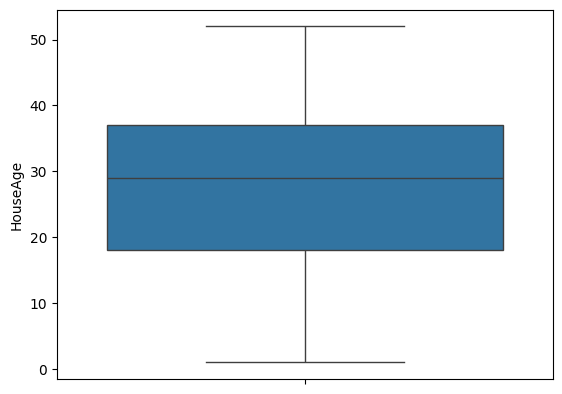

In [61]:
sns.boxplot(df['HouseAge'])
plt.show()

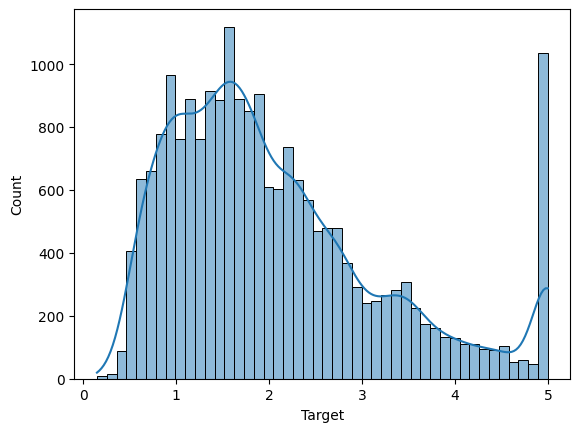

In [63]:
sns.histplot(df['Target'], kde=True)
plt.show()

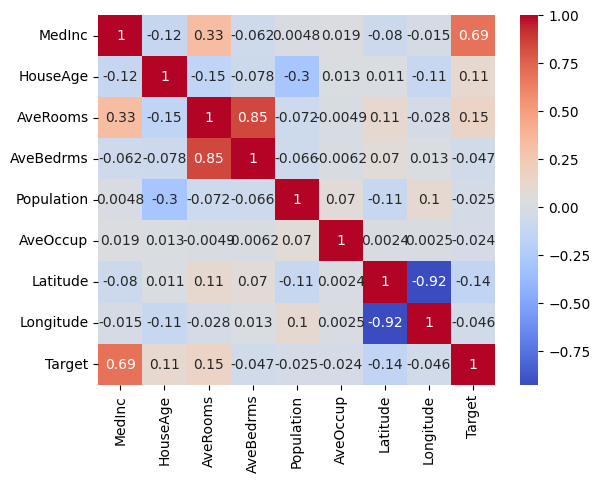

In [65]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

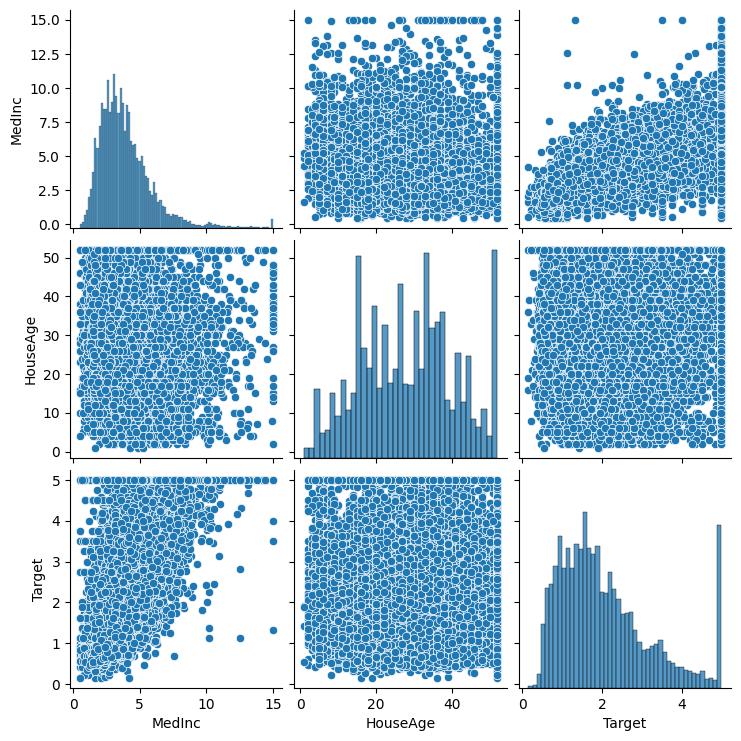

In [67]:
sns.pairplot(df[['MedInc', 'HouseAge', 'Target']])
plt.show()

In [69]:
X = df.drop('Target', axis=1)
y = df['Target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [71]:
y_log = np.log1p(y)

In [73]:
_, p_value =stats.shapiro(df['HouseAge'])
print(f'P-valuefor normality test: {p_value}')

P-valuefor normality test: 1.5602225615812071e-47


In [75]:
X_with_const = sm.add_constant(X_scaled)
vif_data = pd.DataFrame()
vif_data['feature'] =['const']+list(X.columns)
vif_data['VIF'] =[variance_inflation_factor(X_with_const, i) for i in range(X_with_const.shape[1])]

print(vif_data)

      feature       VIF
0       const  1.000000
1      MedInc  2.501295
2    HouseAge  1.241254
3    AveRooms  8.342786
4   AveBedrms  6.994995
5  Population  1.138125
6    AveOccup  1.008324
7    Latitude  9.297624
8   Longitude  8.962263


In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_log, test_size=0.2, random_state=42)


In [77]:
model = LinearRegression()
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-Validation Scores: {cv_scores}')


Cross-Validation Scores: [-0.04768692 -0.04639181 -0.04725895 -0.04665592 -0.04900732]


In [78]:
models = {
    'Linear Regression': LinearRegression(),
    'SVM': SVR(),
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{name} - MSE: {mean_squared_error(y_test, y_pred)}, R2: {r2_score(y_test, y_pred)}')


Linear Regression - MSE: 0.05034011172872022, R2: 0.6006159722803464
SVM - MSE: 0.02812424714403195, R2: 0.7768702786855732
Random Forest - MSE: 0.021863458573832754, R2: 0.8265415819465225
Decision Tree - MSE: 0.04192190661671696, R2: 0.667403600442957
Gradient Boosting - MSE: 0.025561898683825215, R2: 0.7971992174446576


Epoch 1/100


C:\Users\PMYLS\Music\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1700 - val_loss: 0.0457
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0369 - val_loss: 0.0345
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0356 - val_loss: 0.0339
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0364 - val_loss: 0.0511
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0650 - val_loss: 0.0403
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0375 - val_loss: 0.0306
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0293 - val_loss: 0.0314
Epoch 8/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0284 - val_loss: 0.0309
Epoch 9/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0307 - val_loss: 0.0289
Epoch 10/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0285 - val_loss: 0.0284
Epoch 11/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0275 - val_loss: 0.0283
Epoch 12/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

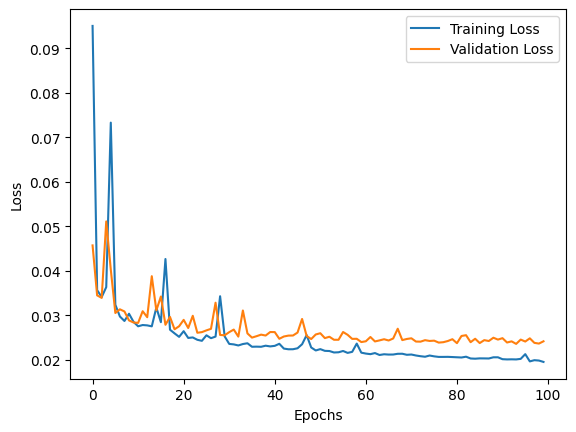

In [79]:
ann_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])
ann_model.compile(optimizer='adam', loss='mean_squared_error')
history = ann_model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [80]:

X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
cnn_ann_model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

cnn_ann_model.compile(optimizer='adam', loss='mean_squared_error')
cnn_history = cnn_ann_model.fit(X_train_reshaped, y_train, epochs=100, validation_split=0.2, verbose=1)


Epoch 1/100


C:\Users\PMYLS\Music\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


413/413 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.3504 - val_loss: 0.0429
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0506 - val_loss: 0.0402
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0371 - val_loss: 0.0342
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0342 - val_loss: 0.0330
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0343 - val_loss: 0.0424
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0460 - val_loss: 0.0340
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0305 - val_loss: 0.0445
Epoch 8/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0446 - val_loss: 0.0377
Epoch 9/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0390 - val_loss: 0.0305
Epoch 10/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0290 - val_loss: 0.0296
Epoch 11/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0290 - val_loss: 0.0293
Epoch 12/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

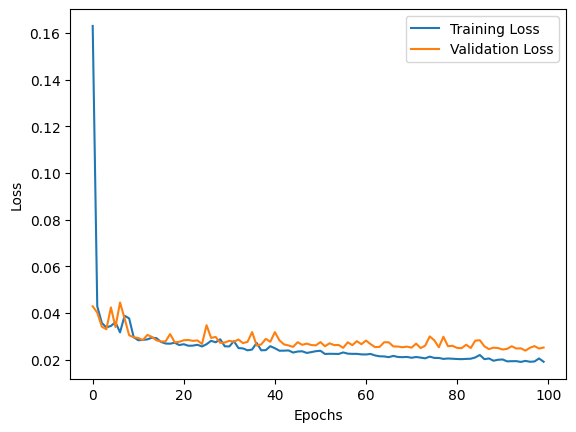

In [81]:
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()